In [1]:
#Importing the Keras libraries and packages
import os
import pandas as pd
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model


In [2]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32,
                                  kernel_size=3,
                                  padding="same",
                                  input_shape=(64, 64, 3),
                                  activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64,
                                  kernel_size=3,
                                  padding="same",
                                  activation="relu"))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

# Part Of Neural Network

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [3]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(
    r"C:\Users\dell\Desktop\MYFILES\anaconda\Covid-19-chest-x-ray-detection\Data\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')
test_set = test_datagen.flow_from_directory(
    r"C:\Users\dell\Desktop\MYFILES\anaconda\Covid-19-chest-x-ray-detection\Data\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=5,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/5
4/4 [==============================] - 14s 4s/step - loss: 0.6573 - accuracy: 0.5700 - val_loss: 0.4544 - val_accuracy: 0.9600
Epoch 2/5
4/4 [==============================] - 11s 3s/step - loss: 0.8671 - accuracy: 0.5400 - val_loss: 0.5204 - val_accuracy: 0.6200
Epoch 3/5
4/4 [==============================] - 11s 3s/step - loss: 0.5013 - accuracy: 0.8000 - val_loss: 0.4395 - val_accuracy: 0.9000
Epoch 4/5
4/4 [==============================] - 11s 4s/step - loss: 0.3941 - accuracy: 0.8500 - val_loss: 0.2939 - val_accuracy: 0.8800
Epoch 5/5
4/4 [==============================] - 11s 4s/step - loss: 0.4191 - accuracy: 0.7600 - val_loss: 0.1848 - val_accuracy: 0.9600


In [5]:
classifier.save(r'C:\Users\dell\Desktop\MYFILES\COVID-19/model.h5')

In [6]:
# evaluation on test set
loaded_model = tf.keras.models.load_model(r'C:\Users\dell\Desktop\MYFILES\COVID-19/model.h5')
loaded_model.evaluate(test_set)

4/4 [==============================] - 6s 1s/step - loss: 0.1848 - accuracy: 0.9600


[0.1847972720861435, 0.9599999785423279]

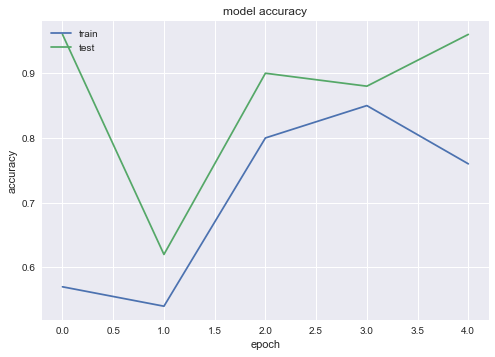

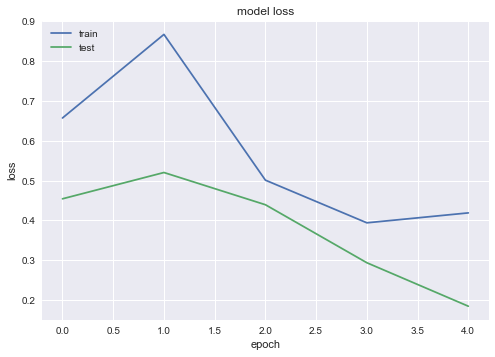

In [7]:

import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Covid


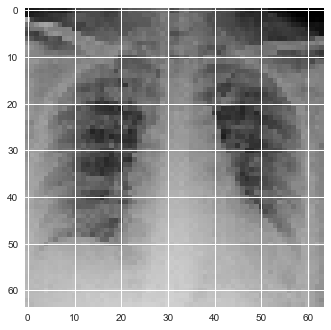

In [12]:
# for only one prediction
import numpy as np

from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

test_image = image.load_img(
    r"C:\Users\dell\Desktop\Data\train\Covid\1-s2.0-S1684118220300608-main.pdf-002.jpg",
    target_size=(64, 64))

plt.imshow(test_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

result = classifier.predict(test_image)

training_set.class_indices

if result[0][0] == 1:
    prediction = 'No - Covid'
else:
    prediction = 'Covid'
print(prediction)

In [9]:
# plot confusion metrix
y_pred = []
y_test = []
import os
for i in os.listdir("Data/test/Normal"):
    img = image.load_img("Data/test/Normal/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(1)
for i in os.listdir("Data/test/Covid"):
    img = image.load_img("Data/test/Covid/"+ i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(0)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

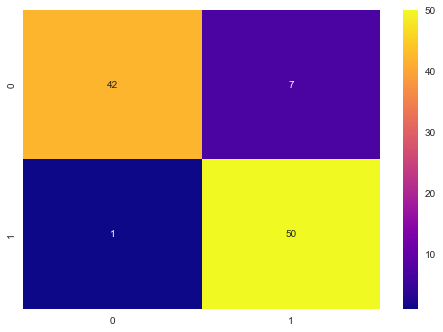

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        49
           1       0.88      0.98      0.93        51

    accuracy                           0.92       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100



In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
cm = confusion_matrix(y_pred, y_test.round())
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

print(classification_report(y_pred, y_test.round()))
